In [14]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import os
from tensorflow.keras import models, layers

In [15]:
data = tf.keras.utils.image_dataset_from_directory("PlantVillage")
data

Found 16011 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_dir = "PlantVillage"
class_names = data.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

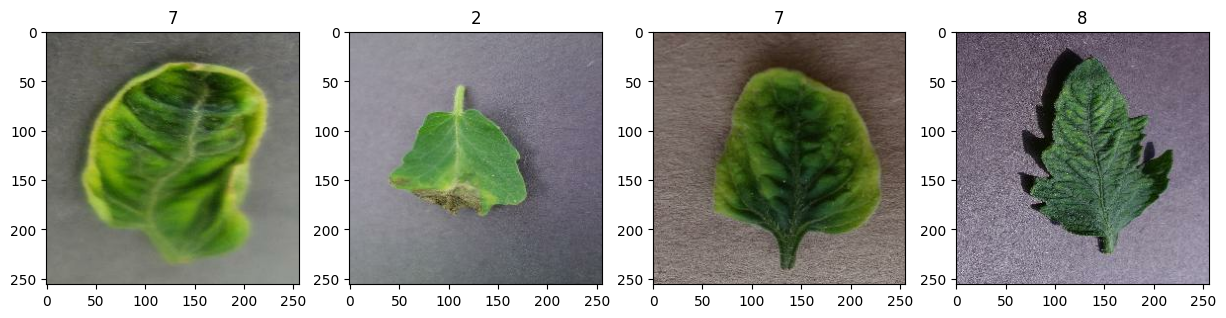

In [17]:
fig , ax = plt.subplots(ncols=4,figsize=(15,15))
for img,labels in data.take(1):
    for i in range(4):
        ax[i].imshow(img[i].numpy().astype(int))
        ax[i].title.set_text(labels[i].numpy())


In [18]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [19]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(64,64),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
model = models.Sequential([
    data_aug,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,64,64,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256,(3,3),activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

In [23]:
model.build(input_shape=(32,64,64,3))

In [24]:
model.compile(
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics = ["accuracy"]
)

In [25]:
callbacks = tf.keras.callbacks.TensorBoard(log_dir="log")

In [26]:
hist = model.fit(train,epochs=50,validation_data=validation,callbacks=[callbacks])

Epoch 1/50


350/350 [==============================] - 70s 196ms/step - loss: 1.7799 - accuracy: 0.3765 - val_loss: 1.4930 - val_accuracy: 0.5103
Epoch 2/50
350/350 [==============================] - 67s 190ms/step - loss: 1.0580 - accuracy: 0.6419 - val_loss: 1.0190 - val_accuracy: 0.6384
Epoch 3/50
350/350 [==============================] - 72s 206ms/step - loss: 0.7594 - accuracy: 0.7354 - val_loss: 0.6667 - val_accuracy: 0.7759
Epoch 4/50
350/350 [==============================] - 65s 186ms/step - loss: 0.6123 - accuracy: 0.7877 - val_loss: 0.9892 - val_accuracy: 0.6756
Epoch 5/50
350/350 [==============================] - 64s 183ms/step - loss: 0.5229 - accuracy: 0.8144 - val_loss: 0.6862 - val_accuracy: 0.7672
Epoch 6/50
350/350 [==============================] - 63s 179ms/step - loss: 0.4631 - accuracy: 0.8351 - val_loss: 0.5207 - val_accuracy: 0.8266
Epoch 7/50
350/350 [==============================] - 63s 178ms/step - loss: 0.4108 - accuracy: 0.8531 - val_loss: 0.5747 - val_accuracy: 0.8

In [30]:
model.evaluate(test)

50/50 [==============================] - 8s 66ms/step - loss: 0.2102 - accuracy: 0.9256


[0.2102256715297699, 0.9256250262260437]

In [32]:
model.save("tomatoe_diseases_detector.h5")

In [2]:
lst = ['Badipala',
 'Caricature',
 'Ginger',
 'Sapota',
 'Spinach1',
 'Parijatha',
 'kamakasturi',
 'Jasmine',
 'Chilly',
 'Raddish',
 'Padri',
 'Amla',
 'Bringaraja',
 'Astma_weed',
 'Malabar_Spinach',
 'Pea',
 'Lantana',
 'Kasambruga',
 'Nooni',
 'Pumpkin',
 'camphor',
 'Tomato',
 'Lemongrass',
 'Marigold',
 'Nelavembu',
 'Citron lime (herelikai)',
 'Ganike',
 'Sampige',
 'Balloon_Vine',
 'Henna',
 'Common rue(naagdalli)',
 'Eucalyptus',
 'Ganigale',
 'Gasagase',
 'kepala',
 'Pepper',
 'Globe Amarnath',
 'Chakte',
 'Seethaashoka',
 'Onion',
 'Drumstick',
 'Ekka',
 'Kambajala',
 'Tecoma',
 'Beans',
 'Arali',
 'Amruthaballi',
 'Pomoegranate',
 'Kohlrabi',
 'Malabar_Nut',
 'Insulin',
 'ashoka',
 'Taro',
 'Turmeric',
 'Coffee',
 'Thumbe','Nerale']
len(lst)

57